#### 1 - Identifique e elimine preditoras correlacionadas. Mostre os coeficientes antes e depois da eliminação. Antes da eliminação não precisa utilizar todas as variáveis da base de dados.

In [463]:
def more_correlated(data, min, max):
    corr = data.corr()
    matrix = pd.DataFrame()
    dic = {}

    for column in corr:    
        for line in corr.columns:
            value = corr[column][line]

            if((value < min and value > -1) or (value > max and value < 1)):    
                dic[line] = value
        
        
        if(len(dic) > 0):
            df = pd.DataFrame({column:dic})
            matrix = pd.concat([matrix, df])
            dic.clear()
        
    return matrix

In [464]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("train.csv")
data = data.drop(["Id"], axis=1)

In [465]:
matrix = more_correlated(data, -0.7, 0.7)

<AxesSubplot:>

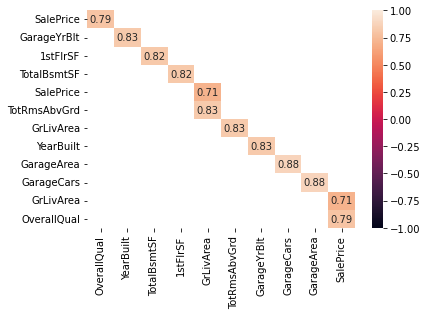

In [466]:
sns.heatmap(matrix, vmin=-1, vmax=1, annot=True)

In [467]:
data = data.drop(["GarageCars", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"], axis=1)

In [468]:
matrix_after = more_correlated(data, -0.7, 0.7)

<AxesSubplot:>

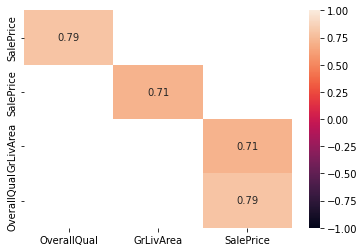

In [469]:
sns.heatmap(matrix_after, vmin=-1, vmax=1, annot=True)

#### 2 - Encontre uma variável de confundimento e demonstre através dos coeficientes os efeitos de utilizar ou não esta variável na regressão.

In [470]:
sp = data["SalePrice"]
sp

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [471]:
train = data.drop(["SalePrice"], axis=1)
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
13            20       RL         91.0    10652   Pave   NaN      IR1   
14            20       RL          NaN    10920   Pave   NaN      IR1   
15            45       RM         51.0     6120   Pave   NaN      Reg   
16            20       RL          NaN    11241   Pave   NaN      IR1   
17            90       RL         72.0    10791   Pave   NaN      Reg   
18            20       RL         66.0    13695   Pave   NaN      Reg   
19            20       RL         70.0     7560   Pave   NaN      Reg   
20            60       RL        101.0    14215   Pave   NaN      IR1   
21            45       RM         57.0     7449   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave   NaN      Reg   
23           120       RM         44.0     4224   Pave   NaN      Reg   
24            20       RL          NaN     8246   Pave   NaN      IR1   
25            20       RL        110.0    14230   Pave   NaN      Reg   
26            20       RL         60.0     7200   Pave   NaN      Reg   
27            20       RL         98.0    11478   Pave   NaN      Reg   
28            20       RL         47.0    16321   Pave   NaN      IR1   
29            30       RM         60.0     6324   Pave   NaN      IR1   
30            70  C (all)         50.0     8500   Pave  Pave      Reg   
31            20       RL          NaN     8544   Pave   NaN      IR1   
32            20       RL         85.0    11049   Pave   NaN      Reg   
33            20       RL         70.0    10552   Pave   NaN      IR1   
34           120       RL         60.0     7313   Pave   NaN      Reg   
35            60       RL        108.0    13418   Pave   NaN      Reg   
36            20       RL        112.0    10859   Pave   NaN      Reg   
37            20       RL         74.0     8532   Pave   NaN      Reg   
38            20       RL         68.0     7922   Pave   NaN      Reg   
39            90       RL         65.0     6040   Pave   NaN      Reg   
40            20       RL         84.0     8658   Pave   NaN      Reg   
41            20       RL        115.0    16905   Pave   NaN      Reg   
42            85       RL          NaN     9180   Pave   NaN      IR1   
43            20       RL          NaN     9200   Pave   NaN      IR1   
44            20       RL         70.0     7945   Pave   NaN      Reg   
45           120       RL         61.0     7658   Pave   NaN      Reg   
46            50       RL         48.0    12822   Pave   NaN      IR1   
47            20       FV         84.0    11096   Pave   NaN      Reg   
48           190       RM         33.0     4456   Pave   NaN      Reg   
49            20       RL         66.0     7742   Pave   NaN      Reg   
50            60       RL          NaN    13869   Pave   NaN      IR2   
51            50       RM         52.0     6240   Pave   NaN      Reg   
52            90       RM        110.0     8472   Grvl   NaN      IR2   
53            20       RL         68.0    50271   Pave   NaN    

In [472]:
#preenchedo valores ausentes e retirando valores categoricos
medians = {}

for i in train:
    if(train[i].dtype == "object"):
        train = train.drop([i], axis=1)
    else:
        if(train[i].isnull().any()):
            medians[i] = train[i].median()

train = train.fillna(value=medians)
train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60         69.0    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9            5       2005   
12            20         69.0    12968            5            6       1962   
13            20         91.0    10652            7            5       2006   
14            20         69.0    10920            6            5       1960   
15            45         51.0     6120            7            8       1929   
16            20         69.0    11241            6            7       1970   
17            90         72.0    10791            4            5       1967   
18            20         66.0    13695            5            5       2004   
19            20         70.0     7560            5            6       1958   
20            60        101.0    14215            8            5       2005   
21            45         57.0     7449            7            7       1930   
22            20         75.0     9742            8            5       2002   
23           120         44.0     4224            5            7       1976   
24            20         69.0     8246            5            8       1968   
25            20        110.0    14230            8            5       2007   
26            20         60.0     7200            5            7       1951   
27            20         98.0    11478            8            5       2007   
28            20         47.0    16321            5            6       1957   
29            30         60.0     6324            4            6       1927   
30            70         50.0     8500            4            4       1920   
31            20         69.0     8544            5            6       1966   
32            20         85.0    11049            8            5       2007   
33            20         70.0    10552            5            5       1959   
34           120         60.0     7313            9            5       2005   
35            60        108.0    13418            8            5       2004   
36            20        112.0    10859            5            5       1994   
37            20         74.0     8532            5            6       1954   
38            20         68.0     7922            5            7       1953   
39            90         65.0     6040            4            5       1955   
40            20         84.0     8658            6            5       1965   
41            20        115.0    16905            5            6       1959   
42            85         69.0     9180            5            7       1983   
43            20         69.0     9200            5            6       1975   
44            20         70.0     7945            5            6       1959   
45           120         61.0     7658            9            5       2005   
46            50         48.0    12822            7            5       2003   
47            20         84.0    11096            8            5       2006   
48           190         33.0     4456            4            5       1920   
49            20         66.0     7742            5     

In [473]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond   YearBuilt  \
0 -190.636242   -57.719331  0.418713  18356.71847  4083.165539  323.482426   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0    198.247628    31.35735    8.536303   -2.052604  ...   29.280874   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea  \
0   25.925955    -6.446551       7.147736  17.591356    54.978452 -43.194537   

    MiscVal      MoSold      YrSold  
0 -0.659622 -119.541054 -946.077341  

[1 rows x 32 columns]

In [474]:
#Pés quadrados do segundo andar (quando maior o segundo andar, mais cara deveria ser a casa, mas neste caso, o preço da casa está diminuindo)
df['2ndFlrSF']

0   -0.391875
Name: 2ndFlrSF, dtype: float64

In [475]:
train["MSZoning"] = data["MSZoning"]
train["MSZoning"]

0            RL
1            RL
2            RL
3            RL
4            RL
5            RL
6            RL
7            RL
8            RM
9            RL
10           RL
11           RL
12           RL
13           RL
14           RL
15           RM
16           RL
17           RL
18           RL
19           RL
20           RL
21           RM
22           RL
23           RM
24           RL
25           RL
26           RL
27           RL
28           RL
29           RM
30      C (all)
31           RL
32           RL
33           RL
34           RL
35           RL
36           RL
37           RL
38           RL
39           RL
40           RL
41           RL
42           RL
43           RL
44           RL
45           RL
46           RL
47           FV
48           RM
49           RL
50           RL
51           RM
52           RM
53           RL
54           RL
55           RL
56           FV
57           RL
58           RL
59           RL
60           RL
61           RM
62      

In [476]:
from category_encoders import OrdinalEncoder

train = pd.get_dummies(train, columns=['MSZoning'] , drop_first=True)
train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60         69.0    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9            5       2005   
12            20         69.0    12968            5            6       1962   
13            20         91.0    10652            7            5       2006   
14            20         69.0    10920            6            5       1960   
15            45         51.0     6120            7            8       1929   
16            20         69.0    11241            6            7       1970   
17            90         72.0    10791            4            5       1967   
18            20         66.0    13695            5            5       2004   
19            20         70.0     7560            5            6       1958   
20            60        101.0    14215            8            5       2005   
21            45         57.0     7449            7            7       1930   
22            20         75.0     9742            8            5       2002   
23           120         44.0     4224            5            7       1976   
24            20         69.0     8246            5            8       1968   
25            20        110.0    14230            8            5       2007   
26            20         60.0     7200            5            7       1951   
27            20         98.0    11478            8            5       2007   
28            20         47.0    16321            5            6       1957   
29            30         60.0     6324            4            6       1927   
30            70         50.0     8500            4            4       1920   
31            20         69.0     8544            5            6       1966   
32            20         85.0    11049            8            5       2007   
33            20         70.0    10552            5            5       1959   
34           120         60.0     7313            9            5       2005   
35            60        108.0    13418            8            5       2004   
36            20        112.0    10859            5            5       1994   
37            20         74.0     8532            5            6       1954   
38            20         68.0     7922            5            7       1953   
39            90         65.0     6040            4            5       1955   
40            20         84.0     8658            6            5       1965   
41            20        115.0    16905            5            6       1959   
42            85         69.0     9180            5            7       1983   
43            20         69.0     9200            5            6       1975   
44            20         70.0     7945            5            6       1959   
45           120         61.0     7658            9            5       2005   
46            50         48.0    12822            7            5       2003   
47            20         84.0    11096            8            5       2006   
48           190         33.0     4456            4            5       1920   
49            20         66.0     7742            5     

In [477]:
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df


MSSubClass  LotFrontage   LotArea   OverallQual  OverallCond   YearBuilt  \
0 -176.639655   -74.206239  0.403325  18392.590169  3990.408843  283.427717   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  3SsnPorch  \
0    208.702953   32.248065     8.72096   -2.137456  ...  17.043406   

   ScreenPorch   PoolArea   MiscVal     MoSold      YrSold   MSZoning_FV  \
0    53.859991 -42.796593 -0.726039 -106.06282 -954.949229  10901.332747   

   MSZoning_RH   MSZoning_RL  MSZoning_RM  
0  8365.107808  10096.422807  2593.587127  

[1 rows x 36 columns]

In [478]:
#Pés quadrados do segundo andar (agora, quando maior o segundo andar, mais cara é a casa)
df['2ndFlrSF']

0    1.108554
Name: 2ndFlrSF, dtype: float64

#### 3 - Encontre um par de variáveis que apresentam interações. Mostre os coeficientes do modelo treinado com interações.

In [479]:
for i in df:
    print(i, " -> ", df[i])

MSSubClass  ->  0   -176.639655
Name: MSSubClass, dtype: float64
LotFrontage  ->  0   -74.206239
Name: LotFrontage, dtype: float64
LotArea  ->  0    0.403325
Name: LotArea, dtype: float64
OverallQual  ->  0    18392.590169
Name: OverallQual, dtype: float64
OverallCond  ->  0    3990.408843
Name: OverallCond, dtype: float64
YearBuilt  ->  0    283.427717
Name: YearBuilt, dtype: float64
YearRemodAdd  ->  0    208.702953
Name: YearRemodAdd, dtype: float64
MasVnrArea  ->  0    32.248065
Name: MasVnrArea, dtype: float64
BsmtFinSF1  ->  0    8.72096
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2  ->  0   -2.137456
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF  ->  0    1.124456
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF  ->  0    7.70796
Name: TotalBsmtSF, dtype: float64
2ndFlrSF  ->  0    1.108554
Name: 2ndFlrSF, dtype: float64
LowQualFinSF  ->  0   -16.287452
Name: LowQualFinSF, dtype: float64
GrLivArea  ->  0    57.40115
Name: GrLivArea, dtype: float64
BsmtFullBath  ->  0    9530.958181
Name: 

In [480]:
train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60         69.0    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9            5       2005   
12            20         69.0    12968            5            6       1962   
13            20         91.0    10652            7            5       2006   
14            20         69.0    10920            6            5       1960   
15            45         51.0     6120            7            8       1929   
16            20         69.0    11241            6            7       1970   
17            90         72.0    10791            4            5       1967   
18            20         66.0    13695            5            5       2004   
19            20         70.0     7560            5            6       1958   
20            60        101.0    14215            8            5       2005   
21            45         57.0     7449            7            7       1930   
22            20         75.0     9742            8            5       2002   
23           120         44.0     4224            5            7       1976   
24            20         69.0     8246            5            8       1968   
25            20        110.0    14230            8            5       2007   
26            20         60.0     7200            5            7       1951   
27            20         98.0    11478            8            5       2007   
28            20         47.0    16321            5            6       1957   
29            30         60.0     6324            4            6       1927   
30            70         50.0     8500            4            4       1920   
31            20         69.0     8544            5            6       1966   
32            20         85.0    11049            8            5       2007   
33            20         70.0    10552            5            5       1959   
34           120         60.0     7313            9            5       2005   
35            60        108.0    13418            8            5       2004   
36            20        112.0    10859            5            5       1994   
37            20         74.0     8532            5            6       1954   
38            20         68.0     7922            5            7       1953   
39            90         65.0     6040            4            5       1955   
40            20         84.0     8658            6            5       1965   
41            20        115.0    16905            5            6       1959   
42            85         69.0     9180            5            7       1983   
43            20         69.0     9200            5            6       1975   
44            20         70.0     7945            5            6       1959   
45           120         61.0     7658            9            5       2005   
46            50         48.0    12822            7            5       2003   
47            20         84.0    11096            8            5       2006   
48           190         33.0     4456            4            5       1920   
49            20         66.0     7742            5     

In [481]:

train.rename(columns = {'2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThirdSsnPorch'}, inplace = True)
train.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM'],
      dtype='object')

In [482]:
train_collumns = ""

for i in train.columns:
    train_collumns = train_collumns + " + "+ i 

train_collumns

' + MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + Fireplaces + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM'

In [483]:
print('SalePrice ~ PoolArea*YrSold'+ train_collumns)

SalePrice ~ PoolArea*YrSold + MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + Fireplaces + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM


In [484]:
train["SalePrice"] = data["SalePrice"]
train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  ScreenPorch  \
0          2003       196.0         706           0  ...            0   
1          1976         0.0         978           0  ...            0   
2          2002       162.0         486           0  ...            0   
3          1970         0.0         216           0  ...            0   
4          2000       350.0         655           0  ...            0   

   PoolArea  MiscVal  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0         0        0       2    2008            0            0            1   
1         0        0       5    2007            0            0            1   
2         0        0       9    2008            0            0            1   
3         0        0       2    2006            0            0            1   
4         0        0      12    2008            0            0            1   

   MSZoning_RM  SalePrice  
0            0     208500  
1            0     181500  
2            0     223500  
3            0     140000  
4            0     250000  

[5 rows x 37 columns]

In [485]:
import statsmodels.formula.api as sm

inter_model = sm.ols(formula='SalePrice ~ BedroomAbvGr*GrLivArea + MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + Fireplaces + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM', data=train)

In [486]:
result = inter_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:12:47   Log-Likelihood:                -17322.
No. Observations:                1460   AIC:                         3.472e+04
Df Residuals:                    1423   BIC:                         3.491e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.477e+05   1.42e+06      0.597      0.550   -1.94e+06    3.63e+06
BedroomAbvGr           -2.241e+04   3338.669     -6.712      0.000    -2.9e+04   -1.59e+04
GrLivArea                 25.2968      8.303      3.047      0.002       9.009      41.584
BedroomAbvGr:GrLivArea     9.8393      1.950      5.046      0.000       6.014      13.665
MSSubClass              -182.9161     28.439     -6.432      0.000    -238.702    -127.130
LotFrontage              -71.1147     52.423     -1.357      0.175    -173.950      31.720
LotArea                    0.4177      0.102      4.076      0.000       0.217       0.619
OverallQual             1.913e+04   1194.343     16.021      0.000    1.68e+04    2.15e+04
OverallCond             3836.4241   1031.555      3.719      0.000    1812.893    5859.956
YearBuilt                266.0204     62.959      4.225      0.000     142.517     389.523
YearRemodAdd             217.1282     66.229      3.278      0.001      87.210     347.046
MasVnrArea                30.9564      5.965      5.190      0.000      19.256      42.657
BsmtFinSF1                 9.2383      2.529      3.654      0.000       4.278      14.198
BsmtFinSF2                -1.6712      4.514     -0.370      0.711     -10.527       7.184
BsmtUnfSF                  0.5869      2.420      0.243      0.808      -4.160       5.334
TotalBsmtSF                8.1540      3.365      2.423      0.016       1.553      14.755
SecondFlrSF               -2.0592      5.437     -0.379      0.705     -12.725       8.606
LowQualFinSF             -32.2581     20.514     -1.572      0.116     -72.499       7.983
BsmtFullBath            8498.3618   2630.627      3.231      0.001    3338.039    1.37e+04
BsmtHalfBath             957.9326   4109.176      0.233      0.816   -7102.760    9018.626
FullBath                5453.9396   2844.033      1.918      0.055    -125.009     1.1e+04
HalfBath                 421.7418   2722.411      0.155      0.877   -4918.627    5762.111
KitchenAbvGr           -6176.6863   5052.404     -1.223      0.222   -1.61e+04    3734.274
Fireplaces              4536.7217   1772.144      2.560      0.011    1060.426    8013.018
GarageArea                30.8350      5.865      5.257      0.000      19.329      42.341
WoodDeckSF                25.5571      8.044      3.177      0.002       9.777      41.337
OpenPorchSF               -4.0784     15.392     -0.265      0.791     -34.271      26.114
EnclosedPorch             15.3984     16.963      0.908      0.364     -17.877      48.674
ThirdSsnPorch             20.4382     31.478      0.649      0.516     -41.309      82.186
ScreenPorch               52.3072     17.234      3.035      0.002      18.500      86.114
PoolArea                 -52.2414     23.830     -2.192      0.029     -98.988  

#### 4 - Mostre os coeficientes do modelo treinado antes e depois da remoção de valores influentes.


In [487]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'SalePrice'],
      dtype='object')

In [488]:
x = train.drop(["SalePrice"], axis=1)
pd.DataFrame([model.coef_], columns=x.columns).sum()

MSSubClass        -176.639655
LotFrontage        -74.206239
LotArea              0.403325
OverallQual      18392.590169
OverallCond       3990.408843
YearBuilt          283.427717
YearRemodAdd       208.702953
MasVnrArea          32.248065
BsmtFinSF1           8.720960
BsmtFinSF2          -2.137456
BsmtUnfSF            1.124456
TotalBsmtSF          7.707960
SecondFlrSF          1.108554
LowQualFinSF       -16.287452
GrLivArea           57.401150
BsmtFullBath      9530.958181
BsmtHalfBath      1440.287867
FullBath          4445.414116
HalfBath         -1618.606930
BedroomAbvGr     -7460.411114
KitchenAbvGr     -5326.809664
Fireplaces        4305.426737
GarageArea          29.849782
WoodDeckSF          25.717332
OpenPorchSF         -4.024984
EnclosedPorch        9.452334
ThirdSsnPorch       17.043406
ScreenPorch         53.859991
PoolArea           -42.796593
MiscVal             -0.726039
MoSold            -106.062820
YrSold            -954.949229
MSZoning_FV      10901.332747
MSZoning_R

In [489]:
x = train.drop(['GrLivArea', 'SalePrice'], axis=1)
model.fit(x, sp)
pd.DataFrame([model.coef_], columns=x.columns).sum()

MSSubClass        -187.582131
LotFrontage        -12.295350
LotArea              0.469708
OverallQual      20373.807707
OverallCond       2932.287819
YearBuilt          114.213201
YearRemodAdd       283.003311
MasVnrArea          39.051668
BsmtFinSF1          16.124226
BsmtFinSF2           6.004687
BsmtUnfSF            5.240477
TotalBsmtSF         27.369390
SecondFlrSF         39.383580
LowQualFinSF        40.083977
BsmtFullBath      8093.160291
BsmtHalfBath        78.301666
FullBath         12372.128059
HalfBath          -451.536566
BedroomAbvGr     -4453.367574
KitchenAbvGr      5907.353658
Fireplaces        9131.865205
GarageArea          41.760554
WoodDeckSF          32.985095
OpenPorchSF          5.883423
EnclosedPorch        9.343851
ThirdSsnPorch       29.779666
ScreenPorch         55.055040
PoolArea           -26.032244
MiscVal             -1.173039
MoSold            -108.595400
YrSold           -1022.521164
MSZoning_FV      10809.356904
MSZoning_RH      12666.322810
MSZoning_R

#### 5 - Mostre se existe ou não heterocedasticidade no seu modelo de regressão linear multivariado.

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

model = sm.ols(formula='SalePrice ~ MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + Fireplaces + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM', data=train)
result = model.fit()
influence = OLSInfluence(result)

c:\Users\yrese\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'abs(residual)')

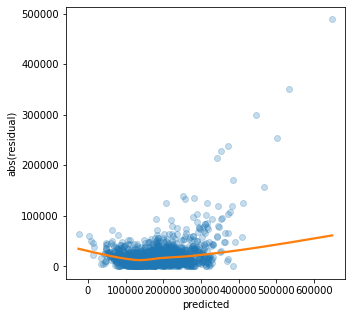

In [497]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(result.fittedvalues, np.abs(result.resid), scatter_kws={'alpha':0.25}, line_kws={'color':'C1'}, lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

#### 6 - Interprete os gráficos residuais parciais no seu modelo de regressão linear multiváriado 

c:\Users\yrese\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


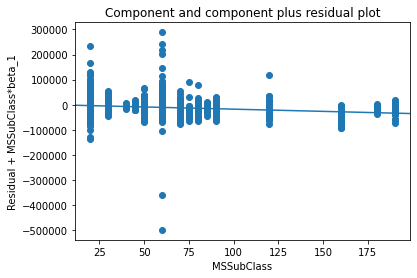

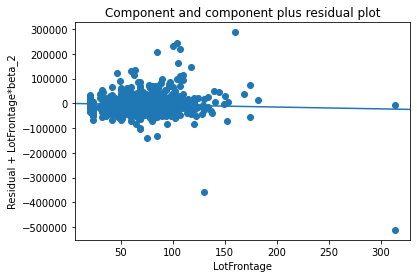

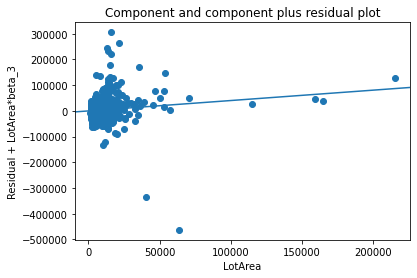

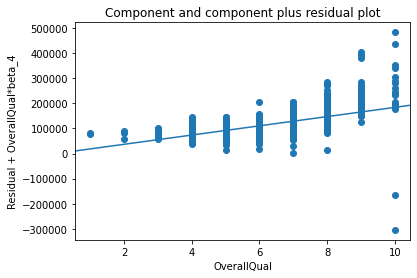

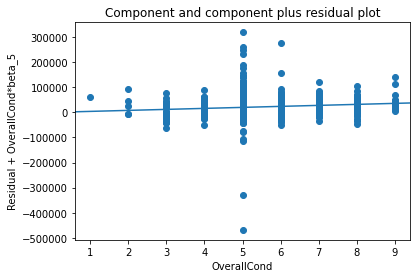

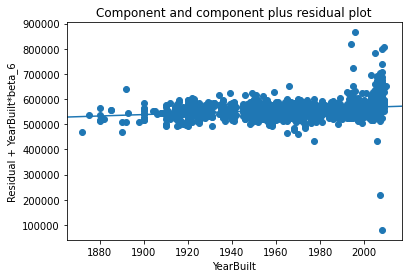

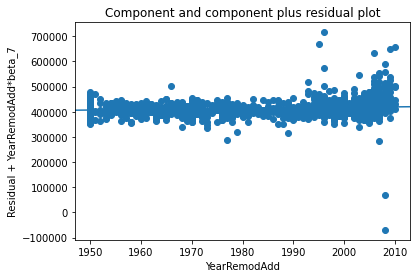

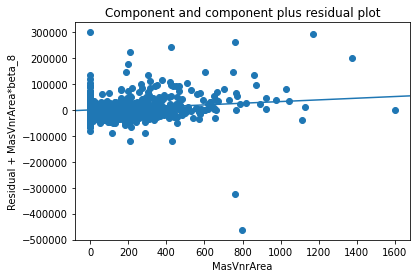

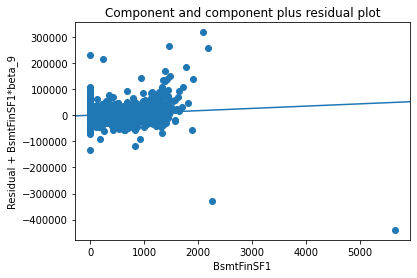

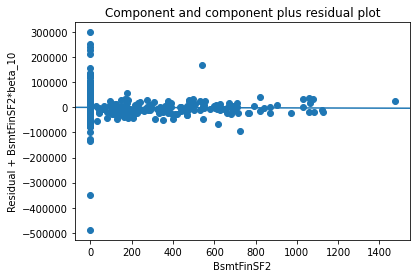

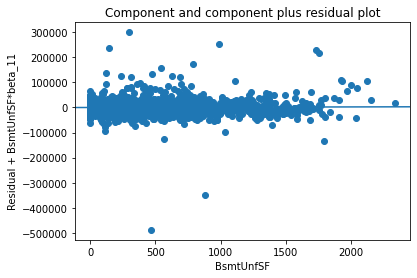

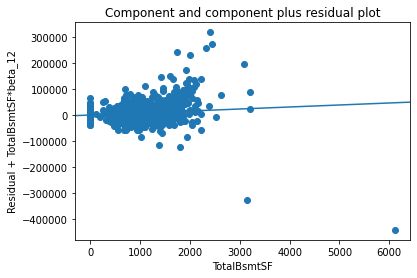

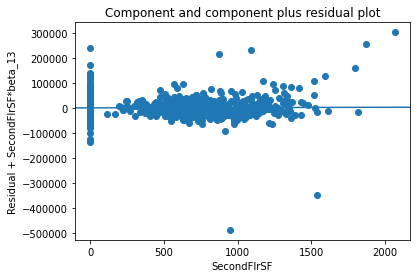

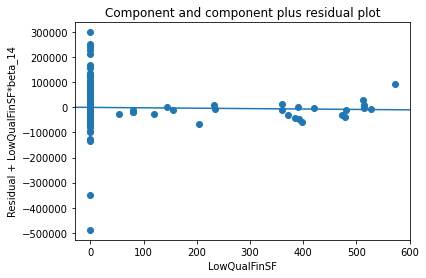

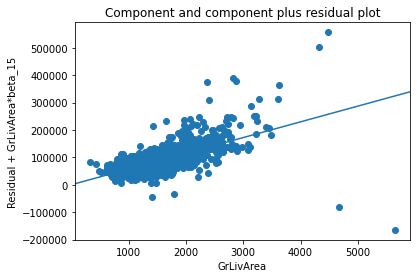

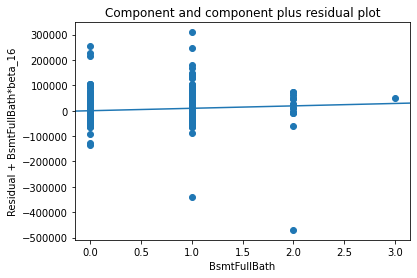

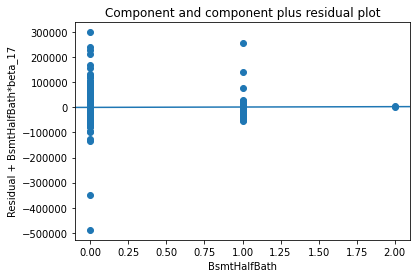

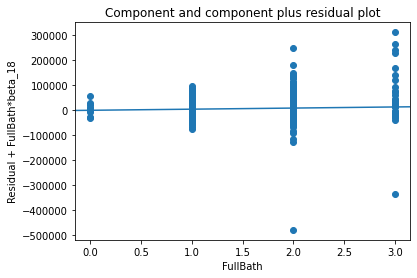

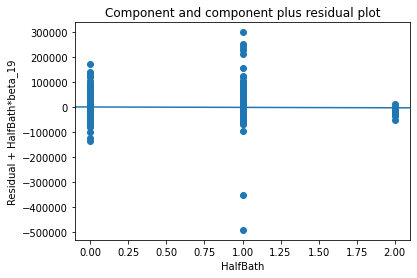

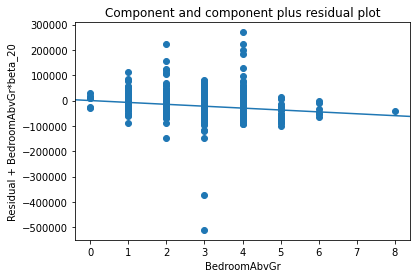

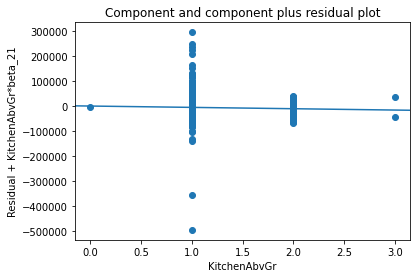

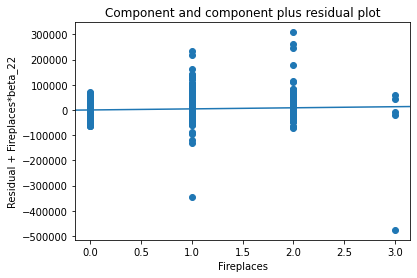

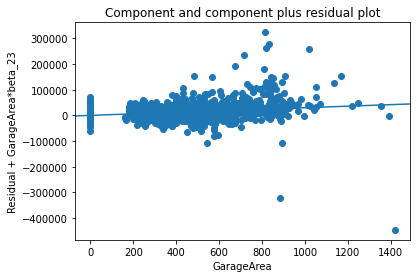

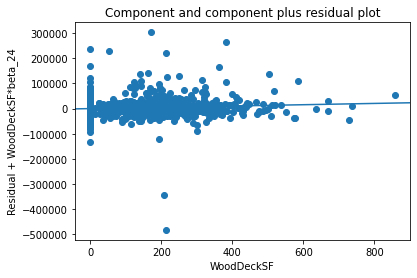

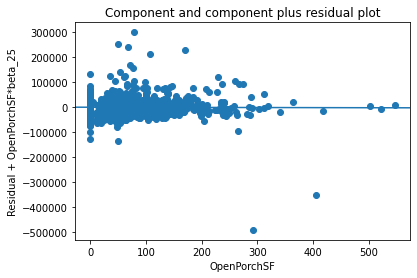

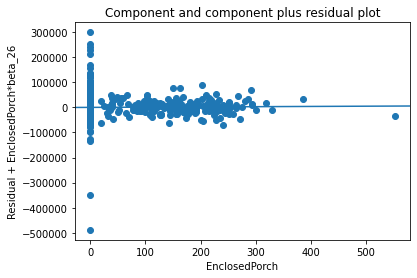

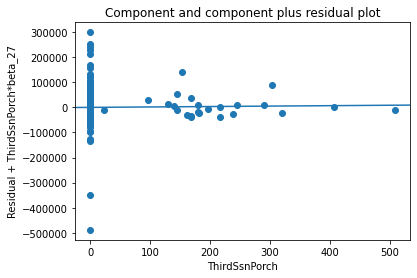

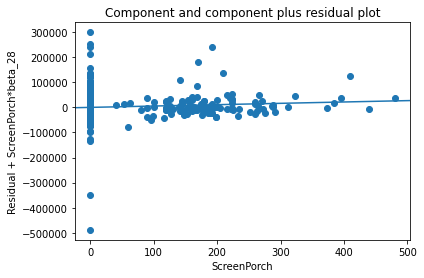

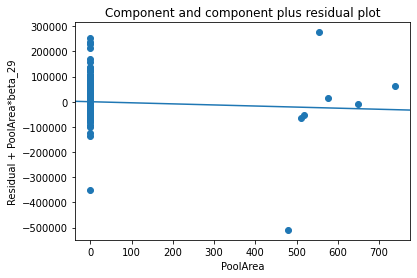

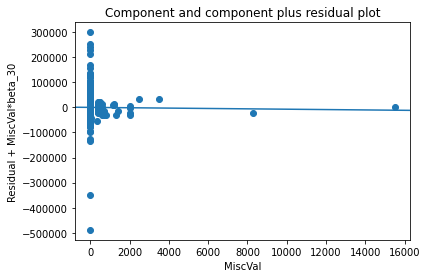

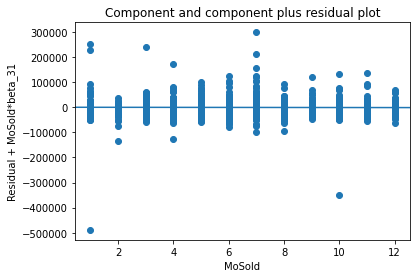

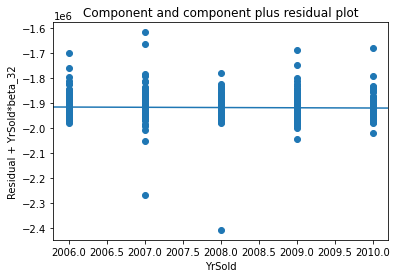

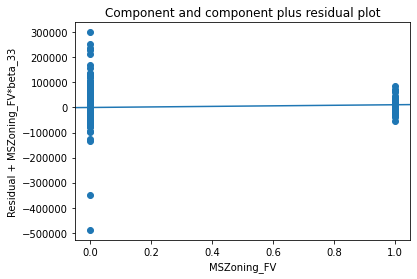

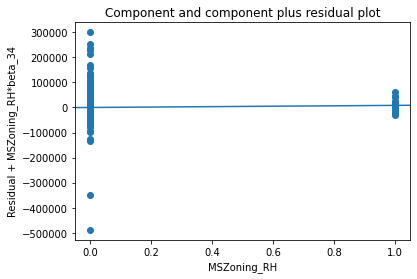

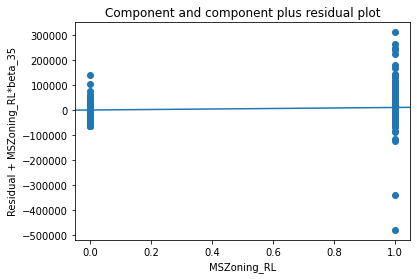

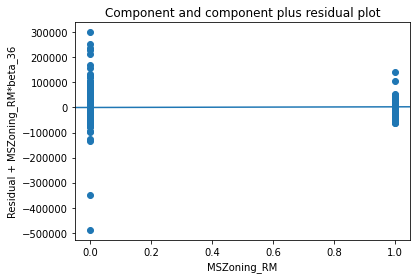

In [504]:
from statsmodels.graphics.regressionplots import plot_ccpr as ccpr

for i in train.drop(['SalePrice'], axis=1):
    ccpr(result, i)